<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Corpus_of_African_Literature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# @title Default title text
# Step 1: Mount Google Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

# Step 2: Set the path to the folder containing the text files
folder_path = '/content/drive/MyDrive/Colab Notebooks/Corpus of African Literature/Wole_Soyinka'  # Change 'YourFolderName' to your actual folder name

# Step 3: List all text files in the folder
import os
text_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Step 4: Merge the content of all text files into a single string
merged_content = ""
for file_name in text_files:
    with open(os.path.join(folder_path, file_name), 'r') as file:
        merged_content += file.read() + "\n\n"  # Adding two newlines to separate content of different files

# Step 5: Write the merged content to a new .txt file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Corpus of African Literature/Soyinka_merged_file.txt'
with open(output_file_path, 'w') as output_file:
    output_file.write(merged_content)

print(f"Merged content written to {output_file_path}")


Merged content written to /content/drive/MyDrive/Colab Notebooks/Corpus of African Literature/Soyinka_merged_file.txt


# New section

In [4]:
# Import a module that helps with filepaths
from pathlib import Path

# Create a filepath for the file
text_file = Path('/content/drive/MyDrive/Colab Notebooks/Corpus of African Literature/Wole_Soyinka/Soyinka_merged_file.txt')

# Open the file, read it and store the text with the name `iliad`
with open(text_file, encoding='utf-8') as file:
    soyinka_corpus = file.read()

soyinka_corpus[0:200]

'\nThe  Open  Sore\n\nof a    CONTINENT\n\n\n\nThe  Open  Sore\n\nof a    CONTINENT\n\nA  Personal Narrative of the Niaerian Crisis\n\nWole  Soyinka\n\nNEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRES'

Tokenising with spaCy

In [5]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [6]:

# Assuming you've already loaded your model into `nlp`
nlp.max_length = len(soyinka_corpus) + 100  # or set it to any higher value you see fit

document = nlp(soyinka_corpus)


Basic Text Cleaning
Here, we'll remove stop words and non-alphabetic tokens:

In [8]:
cleaned_tokens = [token.text for token in document if not token.is_stop and token.is_alpha]


In [10]:
!pip install nltk


In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Token Frequency Distribution with NLTK
Now, let's use NLTK to get a frequency distribution of the cleaned tokens:

In [12]:
freq_dist = FreqDist(cleaned_tokens)
print(freq_dist.most_common(50))  # Top 50 words


[('time', 1612), ('like', 1476), ('know', 1375), ('man', 1328), ('said', 1156), ('world', 1116), ('way', 875), ('come', 839), ('head', 828), ('long', 769), ('nation', 751), ('people', 725), ('African', 724), ('came', 698), ('day', 661), ('think', 657), ('power', 645), ('face', 632), ('right', 629), ('home', 628), ('new', 620), ('took', 618), ('place', 618), ('mind', 595), ('eyes', 575), ('left', 568), ('away', 560), ('course', 555), ('hand', 535), ('human', 532), ('let', 531), ('life', 530), ('house', 520), ('thought', 514), ('night', 513), ('moment', 504), ('simply', 499), ('state', 496), ('Nigeria', 495), ('tell', 487), ('find', 460), ('knew', 454), ('government', 447), ('found', 447), ('Africa', 443), ('black', 436), ('hands', 435), ('end', 433), ('Sagoe', 432), ('looked', 431)]


Named Entity Recognition with spaCy
Explore the named entities in the corpus:

In [14]:
for ent in document.ents[:50]:  # Displaying the first 50 entities
    print(ent.text, ent.label_)


Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS WORK_OF_ART
1996 DATE
Tai Solarin PERSON
two CARDINAL
June 30, 1994 DATE
the day DATE
Oxford University Press ORG
New York GPE
Athens GPE
Auckland   Bangkok GPE
Bogota GPE
Bombay GPE
Buenos Aires GPE
Delhi GPE
Florence GPE
Hong Kong GPE
Istanbul GPE
Karachi GPE
Kuala Lumpur GPE
Madrid GPE
Melbourne GPE
Mexico City GPE
Nairobi GPE
Singapore GPE
Taipei GPE
Tokyo GPE
Toronto GPE
Berlin GPE
Ibadan GPE
1996 DATE
Wole Soyinka

Published by OJ<I'ord University  Press, Inc. WORK_OF_ART
Madison Avenue FAC
New York GPE
New York GPE
10016 DATE
AD DATE
Oxford University Press ORG
Wole GPE
Nigerian NORP
Wole Soyinka PERSON
o-19·�10H7 DATE
1 CARDINAL
Soylnka PERSON
Wole-Homes ORG
2 CARDINAL
Soylnka PERSON
4 CARDINAL
Nigeria-Politics ORG
I.  Title ORG
19 CARDINAL


Sentence Exploration
Let's explore the first few sentences in your corpus:

In [15]:
for sent in list(document.sents)[:10]:  # Displaying the first 10 sentences
    print(sent.text)
    print('---')



The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr. Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994.
---
and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc.,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press

AD rights reserved.
---
No pan of this publication may be reproduced,

Lemmatization using spaCy
Using spaCy, you can easily lemmatize tokens to reduce them to their base form.

In [17]:
lemmatized_tokens = [token.lemma_ for token in document if not token.is_stop and token.is_alpha]


Advanced Text Cleaning
Here are some more advanced cleaning techniques:

Lowercasing Everything:

In [20]:
tokens = [word.text for word in document]
tokens

['\n',
 'The',
 ' ',
 'Open',
 ' ',
 'Sore',
 '\n\n',
 'of',
 'a',
 '   ',
 'CONTINENT',
 '\n\n\n\n',
 'The',
 ' ',
 'Open',
 ' ',
 'Sore',
 '\n\n',
 'of',
 'a',
 '   ',
 'CONTINENT',
 '\n\n',
 'A',
 ' ',
 'Personal',
 'Narrative',
 'of',
 'the',
 'Niaerian',
 'Crisis',
 '\n\n',
 'Wole',
 ' ',
 'Soyinka',
 '\n\n',
 'NEW',
 ' ',
 'YORK',
 '   ',
 '•',
 '     ',
 'OXFORD',
 '   ',
 '•',
 '      ',
 'OXFORD',
 '  ',
 'UNIVERSITY',
 '  ',
 'PRESS',
 '  ',
 '•',
 '       \n',
 '1996',
 '\n\n\n',
 'Dedicated',
 'to',
 'the',
 'memory',
 'of',
 '\n\n',
 'Dr.',
 'Tai',
 'Solarin',
 ',',
 'conscience',
 'of',
 'the',
 'nation',
 ',',
 '\n\n',
 'who',
 'walked',
 'a',
 'last',
 '"',
 'step',
 'or',
 'two',
 '"',
 'with',
 'that',
 'nation',
 '\n',
 'on',
 'June',
 '30',
 ',',
 '1994',
 '.',
 'and',
 'slept',
 'the',
 'day',
 'after',
 '\n\n',
 'Oxford',
 'University',
 'Press',
 '\n\n',
 'OJ',
 '<',
 "I'ord",
 '  ',
 'New',
 'York',
 '\n\n',
 'Athens',
 '  ',
 'Auckland',
 '  ',
 'Bangkok',
 '  

In [21]:
cleaned_tokens_lower = [token.lower() for token in lemmatized_tokens]


In [22]:
document.text[0:5000]

'\nThe  Open  Sore\n\nof a    CONTINENT\n\n\n\nThe  Open  Sore\n\nof a    CONTINENT\n\nA  Personal Narrative of the Niaerian Crisis\n\nWole  Soyinka\n\nNEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        \n1996\n\n\nDedicated to the memory of\n\nDr. Tai Solarin, conscience of the nation,\n\nwho walked a last "step or two" with that nation\non June 30, 1994. and slept the day after\n\nOxford University Press\n\nOJ<I\'ord   New York\n\nAthens   Auckland   Bangkok   Bogota   Bombay\nBuenos Aires   Calcutta   Cape Town   Dares Salaam\nDelhi   Florence   Hong Kong   Istanbul   Karachi\nKuala Lumpur   Madras   Madrid   Melbourne\nMexico City   Nairobi   Parts   Singapore\n\nTaipei   Tokyo   Toronto\n\nand associated companies In\nBerlin   Ibadan\n\nCopyright   ©   1996 by Wole Soyinka\n\nPublished by OJ<I\'ord University  Press, Inc.,\nMadison Avenue, New York, New York 10016\n\nOJ<I\'ord is a registered trademark of OJ<I\'ord University Press\n\nAD rights reserved. 

Tokenization into Words and Sentences using spaCy

In [25]:
# Assuming you've already processed the corpus with spaCy as 'doc'
word_tokens = [token.text for token in document]
sentence_tokens = [sent.text for sent in document.sents]

# Print the first 20 word tokens
print("First 20 word tokens:")
print(word_tokens[:20])



First 20 word tokens:
['\n', 'The', ' ', 'Open', ' ', 'Sore', '\n\n', 'of', 'a', '   ', 'CONTINENT', '\n\n\n\n', 'The', ' ', 'Open', ' ', 'Sore', '\n\n', 'of', 'a']


In [26]:
# Print the first 5 sentences
print("\nFirst 5 sentences:")
for sent in sentence_tokens[:5]:
    print(sent)



First 5 sentences:

The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr. Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994.
and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc.,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press

AD rights reserved.
No pan of this publication may be

In [29]:
# Use spaCy's list of stop words
from spacy.lang.en.stop_words import STOP_WORDS

filtered_tokens = [token for token in word_tokens if token.lower() not in STOP_WORDS]

# If you have custom meaningless words, add them to the list and filter
# custom_stopwords = ["meaningless_word1", "meaningless_word2"]  # replace with your list
# filtered_tokens = [token for token in filtered_tokens if token.lower() not in custom_stopwords]

print("Filtered tokens (first 2000):")
print(filtered_tokens[:2000])


Filtered tokens (first 2000):
['\n', ' ', 'Open', ' ', 'Sore', '\n\n', '   ', 'CONTINENT', '\n\n\n\n', ' ', 'Open', ' ', 'Sore', '\n\n', '   ', 'CONTINENT', '\n\n', ' ', 'Personal', 'Narrative', 'Niaerian', 'Crisis', '\n\n', 'Wole', ' ', 'Soyinka', '\n\n', 'NEW', ' ', 'YORK', '   ', '•', '     ', 'OXFORD', '   ', '•', '      ', 'OXFORD', '  ', 'UNIVERSITY', '  ', 'PRESS', '  ', '•', '       \n', '1996', '\n\n\n', 'Dedicated', 'memory', '\n\n', 'Dr.', 'Tai', 'Solarin', ',', 'conscience', 'nation', ',', '\n\n', 'walked', '"', 'step', '"', 'nation', '\n', 'June', '30', ',', '1994', '.', 'slept', 'day', '\n\n', 'Oxford', 'University', 'Press', '\n\n', 'OJ', '<', "I'ord", '  ', 'New', 'York', '\n\n', 'Athens', '  ', 'Auckland', '  ', 'Bangkok', '  ', 'Bogota', '  ', 'Bombay', '\n', 'Buenos', 'Aires', '  ', 'Calcutta', '  ', 'Cape', 'Town', '  ', 'Dares', 'Salaam', '\n', 'Delhi', '  ', 'Florence', '  ', 'Hong', 'Kong', '  ', 'Istanbul', '  ', 'Karachi', '\n', 'Kuala', 'Lumpur', '  ', 'Madras

In [31]:
# Remove specific characters from word tokens
filtered_tokens = [token.replace('.', '').strip() for token in word_tokens if token not in ['.', ' ']]

# Print the first 20 filtered word tokens
print("Filtered tokens (first 2000):")
print(filtered_tokens[:2000])


Filtered tokens (first 2000):
['', 'The', 'Open', 'Sore', '', 'of', 'a', '', 'CONTINENT', '', 'The', 'Open', 'Sore', '', 'of', 'a', '', 'CONTINENT', '', 'A', 'Personal', 'Narrative', 'of', 'the', 'Niaerian', 'Crisis', '', 'Wole', 'Soyinka', '', 'NEW', 'YORK', '', '•', '', 'OXFORD', '', '•', '', 'OXFORD', '', 'UNIVERSITY', '', 'PRESS', '', '•', '', '1996', '', 'Dedicated', 'to', 'the', 'memory', 'of', '', 'Dr', 'Tai', 'Solarin', ',', 'conscience', 'of', 'the', 'nation', ',', '', 'who', 'walked', 'a', 'last', '"', 'step', 'or', 'two', '"', 'with', 'that', 'nation', '', 'on', 'June', '30', ',', '1994', 'and', 'slept', 'the', 'day', 'after', '', 'Oxford', 'University', 'Press', '', 'OJ', '<', "I'ord", '', 'New', 'York', '', 'Athens', '', 'Auckland', '', 'Bangkok', '', 'Bogota', '', 'Bombay', '', 'Buenos', 'Aires', '', 'Calcutta', '', 'Cape', 'Town', '', 'Dares', 'Salaam', '', 'Delhi', '', 'Florence', '', 'Hong', 'Kong', '', 'Istanbul', '', 'Karachi', '', 'Kuala', 'Lumpur', '', 'Madras', ''

In [32]:
# Remove specific characters from sentences
filtered_sentences = [sent.replace('.', '').strip() for sent in sentence_tokens if sent not in ['.', ' ']]

# Print the first 5 filtered sentences
print("\nFiltered sentences (first 50):")
for sent in filtered_sentences[:50]:
    print(sent)



Filtered sentences (first 50):
The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994
and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press

AD rights reserved
No pan of this publication

In [34]:
MIN_SENT_LENGTH = 3  # Minimum number of words for a sentence to be considered valid

filtered_sentences = [sent for sent in sentence_tokens if len(sent.split()) >= MIN_SENT_LENGTH]

print("Filtered sentences (first 50):")
for sent in filtered_sentences[:50]:
    print(sent)


Filtered sentences (first 50):

The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr. Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994.
and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc.,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press

AD rights reserved.
No pan of this publica

Another advanced approach to detect fragmented sentences is to use syntactic parsing and ensure that each sentence has a subject and a verb.

Using syntactic parsing to ensure that each sentence has both a subject and a verb can be an effective way to filter out sentence fragments. Here's how you can achieve this with spaCy:

**Parsing for Subject and Verb:**

> To ensure that a sentence has both a subject and a verb, we'll look for specific dependency tags in the parsed sentence. The tags nsubj, nsubjpass, and csubj typically indicate nominal subjects, while verbs can be identified by their part-of-speech tag.

In [ ]:
def is_complete_sentence(sentence):
    # Parse the sentence using spaCy
    parsed_sentence = nlp(sentence)

    # Check for the presence of a subject and a verb
    has_subject = any(token.dep_ in ["nsubj", "nsubjpass", "csubj"] for token in parsed_sentence)
    has_verb = any(token.pos_ == "VERB" for token in parsed_sentence)

    return has_subject and has_verb

# Filter the sentences
complete_sentences = [sent for sent in sentence_tokens if is_complete_sentence(sent)]

# Print the first 5 complete sentences
print("Complete sentences (first 50):")
for sent in complete_sentences[:50]:
    print(sent)


In [36]:
# Print the first 5 complete sentences
print("Complete sentences (first 50):")
for sent in complete_sentences[:50]:
    print(sent)

Complete sentences (first 50):

The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr. Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994.
and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc.,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press

AD rights reserved.
No pan of this publica

The first step, as mentioned, is to parse the sentences to ensure they have both a subject and a verb. Once we've parsed for subject and verb, additional steps can be taken to further refine or explore the data:

**2. Extracting Subjects and Verbs:**


> After identifying complete sentences, you might want to extract the subjects and verbs for analysis.



In [38]:
def extract_subjects_and_verbs(sentence):
    subjects = [token.text for token in sentence if token.dep_ in ["nsubj", "nsubjpass", "csubj"]]
    verbs = [token.text for token in sentence if token.pos_ == "VERB"]
    return subjects, verbs

# Extract subjects and verbs from the first 50 complete sentences
for sent in complete_sentences[:500]:
    parsed_sentence = nlp(sent)
    subjects, verbs = extract_subjects_and_verbs(parsed_sentence)
    print(f"Sentence: {sent}")
    print(f"Subjects: {subjects}")
    print(f"Verbs: {verbs}")
    print("----")


Sentence: 
The  Open  Sore

of a    CONTINENT



The  Open  Sore

of a    CONTINENT

A  Personal Narrative of the Niaerian Crisis

Wole  Soyinka

NEW  YORK    •      OXFORD    •       OXFORD   UNIVERSITY   PRESS   •        
1996


Dedicated to the memory of

Dr. Tai Solarin, conscience of the nation,

who walked a last "step or two" with that nation
on June 30, 1994.
Subjects: ['who']
Verbs: ['Dedicated', 'walked']
----
Sentence: and slept the day after

Oxford University Press

OJ<I'ord   New York

Athens   Auckland   Bangkok   Bogota   Bombay
Buenos Aires   Calcutta   Cape Town   Dares Salaam
Delhi   Florence   Hong Kong   Istanbul   Karachi
Kuala Lumpur   Madras   Madrid   Melbourne
Mexico City   Nairobi   Parts   Singapore

Taipei   Tokyo   Toronto

and associated companies In
Berlin   Ibadan

Copyright   ©   1996 by Wole Soyinka

Published by OJ<I'ord University  Press, Inc.,
Madison Avenue, New York, New York 10016

OJ<I'ord is a registered trademark of OJ<I'ord University Press


3. Analyzing Sentence Length:
It might be useful to analyze the length of the complete sentences to get an idea about their distribution.

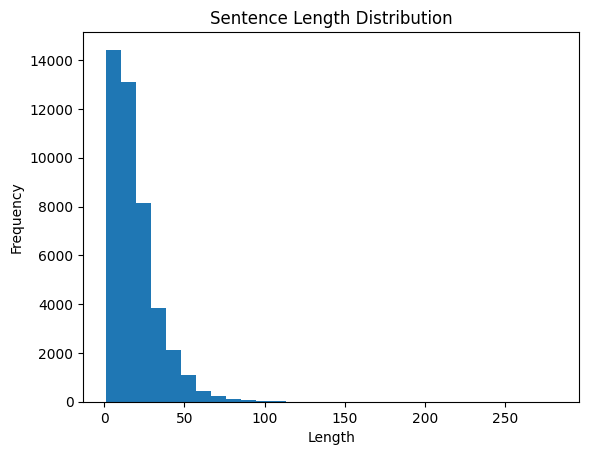

In [42]:
import matplotlib.pyplot as plt

sentence_lengths = [len(sent.split()) for sent in complete_sentences]
plt.hist(sentence_lengths, bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


4. Analyzing Verb Tenses:
With the parsed sentences, you can analyze the tenses of the verbs.

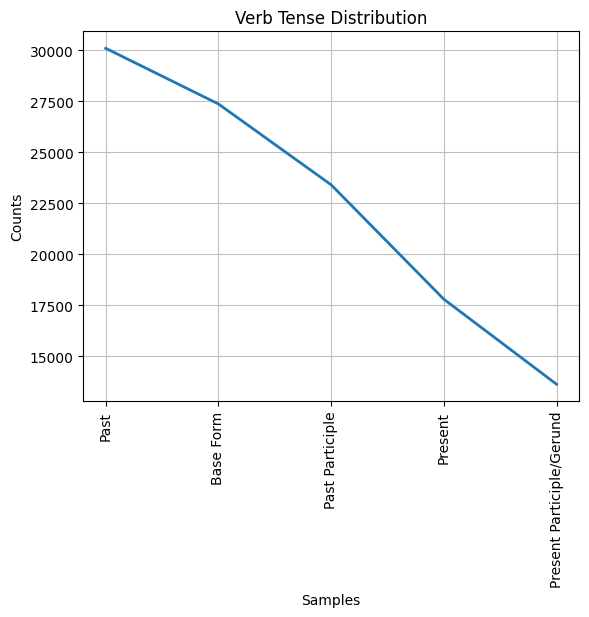

<Axes: title={'center': 'Verb Tense Distribution'}, xlabel='Samples', ylabel='Counts'>

In [43]:
def verb_tense(verb_token):
    if verb_token.tag_ == "VBD":
        return "Past"
    elif verb_token.tag_ == "VBG":
        return "Present Participle/Gerund"
    elif verb_token.tag_ == "VBN":
        return "Past Participle"
    elif verb_token.tag_ == "VBP" or verb_token.tag_ == "VBZ":
        return "Present"
    elif verb_token.tag_ == "VB":
        return "Base Form"
    else:
        return "Unknown"

tenses = [verb_tense(token) for sent in complete_sentences for token in nlp(sent) if token.pos_ == "VERB"]
tense_distribution = FreqDist(tenses)
tense_distribution.plot(title="Verb Tense Distribution")


# Insights from Verb Tense Distribution

---

### Dominant Tense
The tense with the highest frequency can tell you about the primary timeframe the text is set in. For instance, a predominance of past tense verbs might suggest a narrative or historical account.

---

### Narrative Style
A mix of present and past tenses can indicate a more dynamic narrative, possibly shifting between events and commentary or between flashbacks and current events.

---

### Presence of Participles
A significant number of present participles (gerunds or continuous tense) might suggest ongoing actions or descriptions, while past participles could be indicative of passive voice constructions or perfect tenses.

---

### Base Form Verbs
A high frequency of base form verbs could suggest imperative sentences (commands, instructions) or general statements of fact or opinion.

---

### Comparison with Genre or Author Style
If you have verb tense distributions for other texts or corpora, you can compare them to see if the observed text has any peculiarities. Some authors, for instance, might favor certain tenses due to their writing style or the nature of their narratives.

---

### Linguistic Evolution
If the text is part of a series or if you analyze multiple works from different time periods, you might observe shifts in tense usage, reflecting either evolving language or changing narrative techniques.

---

### Contextual Interpretation
The insights should always be contextualized. For example, a historical account or memoir would understandably have a high frequency of past tense verbs, while a self-help book might have more present and base form verbs due to its instructive nature.

# Insights from Verb Tense Distribution in a Corpus

---

## 📜 Narrative Nature
The dominant use of the past tense suggests that the majority of the content in the corpus pertains to events, situations, or states that have already occurred. This could mean the text is largely retrospective or historical in nature.

---

## 🕰 Current Relevance
The significant presence of the present tense indicates that the corpus also discusses current events, states, or general truths. This mix of past and present tenses can be characteristic of narratives that juxtapose historical events with their current implications or commentaries.

---

## 🔮 Anticipation or Projection
The use of the future tense, though less than past and present, is still notable. This suggests that there's a substantial amount of content discussing anticipated events, predictions, or future intentions.

---

## 📊 Statistical Observations
The average verb tense count being 25,000, slightly above the median of 24,500, indicates a fairly even distribution across the tenses. However, the slightly higher average compared to the median suggests there's a minor skew towards one of the tenses, which in this case is the past tense.

---

## 🖋 Linguistic Choices
A preference for the past tense might also reflect certain linguistic or stylistic choices. For instance, in many narrative styles, events are often recounted in the past tense, even if they have current relevance.

---

## 🌐 Contextual Interpretation
The insights should be contextualized with the nature of the corpus. If the corpus consists of autobiographical works, the dominance of past tense would be expected. If it's a series of speculative essays or predictive analyses, the presence of future tense would be significant.

---

## 🔍 Comparative Analysis
If you have access to verb tense distributions from other corpora or genres, comparing them can provide insights into stylistic or thematic differences.




# 5. Exploring Sentence Structures:
You can further examine the syntactic structures of sentences, such as **subject-verb-object (SVO) patterns**, to understand the common structures in your corpus.

These steps will allow you to derive deeper insights from your data and ensure that the sentences you're working with are both syntactically valid and meaningful for your analysis.

To explore sentence structures, specifically the Subject-Verb-Object (SVO) patterns, in Google Colab using spaCy, you can use the following code:

Install and Import Necessary Libraries:
(If you haven't already imported or installed spaCy and its models in the Colab notebook)

**A. Define Function to Extract SVO Patterns:**

In [44]:
def extract_svo(sentence):
    subject = ""
    verb = ""
    obj = ""

    # Parse the sentence using spaCy
    parsed_sentence = nlp(sentence)

    for token in parsed_sentence:
        # Check for subject
        if "subj" in token.dep_:
            subject = token.text
        # Check for verb
        elif token.pos_ == "VERB":
            verb = token.text
        # Check for object
        elif "obj" in token.dep_:
            obj = token.text

    return subject, verb, obj


**B. Process Text and Extract SVO Patterns:**

In [46]:
# Convert complete_sentences back into a single text string
text = ' '.join(complete_sentences)

# Parse the sentences using spaCy
sentences = list(nlp(text).sents)
svo_patterns = [extract_svo(sent.text) for sent in sentences]

for pattern in svo_patterns:
    print(f"Subject: {pattern[0]}, Verb: {pattern[1]}, Object: {pattern[2]}")


Streaming output truncated to the last 5000 lines.
Subject: bookseller, Verb: shouted, Object: 
Subject: hand, Verb: offended, Object: me
Subject: father, Verb: sighed, Object: 
Subject: you, Verb: standing, Object: him
Subject: injunctions, Verb: taken, Object: Peter
Subject: hand, Verb: offended, Object: thee
Subject: which, Verb: visited, Object: bookseller
Subject: he, Verb: speaking, Object: God
Subject: God, Verb: prosecute, Object: bookseller
Subject: bookseller, Verb: experience, Object: contest
Subject: who, Verb: struggled, Object: voice
Subject: it, Verb: made, Object: 
Subject: Essay, Verb: advanced, Object: step
Subject: bookseller, Verb: escaped, Object: door
Subject: they, Verb: fling, Object: feast
Subject: I, Verb: watch, Object: parsonage
Subject: others, Verb: regain, Object: homes
Subject: they, Verb: waved, Object: one
Subject: M, Verb: armed, Object: abiku
Subject: Tinu, Verb: gone, Object: 
Subject: She, Verb: attached, Object: it
Subject: who, Verb: occupied, Ob